# Packages

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import glob

# Functions and constants

# Read data

In [19]:
# Load all days dataset and extract TCWV values
all_days = xr.open_dataset('tcwv_all_days.nc')
tcwv_all_days = all_days['tcwv'].values.flatten()
all_days_df = pd.DataFrame({'tcwv': tcwv_all_days}).dropna()

# Load extreme tcwv values from CSV 
extreme_csv_path = 'tcwv_extreme_days.csv'
try:
    extreme_df = pd.read_csv(extreme_csv_path)
    extreme_days_df = extreme_df['tcwv'].dropna().values  # Ensure no NaNs
except FileNotFoundError:
    print(f"Warning: {extreme_csv_path} not found. Proceeding with empty extreme days data.")
    extreme_days_df = np.array([])  # Handle missing file case

# Analysis

In [20]:
# Compute means only if the extreme days data is available
mean_all_days = all_days_df['tcwv'].mean()
mean_extreme_days = extreme_days_df.mean() if len(extreme_days_df) > 0 else np.nan

# Plots

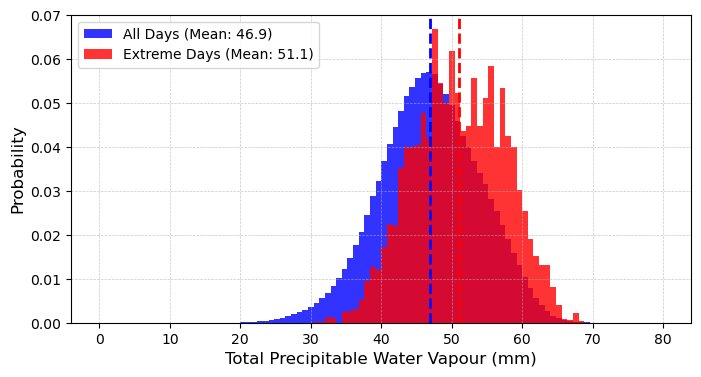

In [21]:
# Create histogram plot
plt.figure(figsize=(8, 4))
bins = np.linspace(0, 80, 101)

# Plot histogram for all days (blue)
plt.hist(all_days_df['tcwv'], bins=bins, density=True, alpha=0.8, color='blue', label=f'All Days (Mean: {mean_all_days:.1f})')

# Only plot extreme days if data is available
if len(extreme_days_df) > 0:
    plt.hist(extreme_days_df, bins=bins, density=True, alpha=0.8, color='red', label=f'Extreme Days (Mean: {mean_extreme_days:.1f})')
else:
    print("No extreme days data available for plotting.")

# Add vertical lines for means
plt.axvline(mean_all_days, color='blue', linestyle='dashed', linewidth=2)

if len(extreme_days_df) > 0:
    plt.axvline(mean_extreme_days, color='red', linestyle='dashed', linewidth=2)

# Labels and title
plt.xlabel('Total Precipitable Water Vapour (mm)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()

# Show plot
plt.show()